## Librerías

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import os

## Llamado de Clases

In [155]:
from src.PipelineProcesamiento import PipelineProcesamiento
from src.utils.metrics import obtener_ruta_app
from src.MetodosEDARNN import TransformadorDeFechas

#### Definición de variable

In [156]:
ejecutar = PipelineProcesamiento(os.path.join(obtener_ruta_app("TemplateAgroIA"), "data/raw/rnn/ESTIM_papa_2005-2025.xls"),os.path.join(obtener_ruta_app("TemplateAgroIA"), "data/raw/rnn/DatosAtmosfericos"))

df= ejecutar.ejecutar_pipeline_completo()
df.head()

2025-07-14 12:39:57,253 - src.PipelineProcesamiento - INFO - Pipeline inicializado correctamente
2025-07-14 12:39:57,253 - src.PipelineProcesamiento - INFO - === INICIANDO PIPELINE COMPLETO ===
2025-07-14 12:39:57,253 - src.PipelineProcesamiento - INFO - Validación de archivos de entrada completada
2025-07-14 12:39:57,266 - src.PipelineProcesamiento - INFO - Iniciando procesamiento de datos de papa
2025-07-14 12:39:57,287 - src.ProcesadorDatosPapa - INFO - Procesando 21 hojas del archivo Excel
2025-07-14 12:39:58,079 - src.ProcesadorDatosPapa - INFO - Procesamiento completado: 1260 registros
2025-07-14 12:39:58,081 - src.PipelineProcesamiento - INFO - Procesamiento de datos de papa completado
2025-07-14 12:39:58,082 - src.PipelineProcesamiento - INFO - Iniciando procesamiento de datos atmosféricos
2025-07-14 12:39:58,083 - src.ProcesadorDatosAtmosfericos - INFO - Procesando 5 archivos CSV
2025-07-14 12:39:58,130 - src.ProcesadorDatosAtmosfericos - INFO - Se procesaron exitosamente 5 de

,canton,mes,anio,produccion,area,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_PAR_TOT,CLRSKY_SFC_SW_DWN,GWETPROF,GWETROOT,...,IMERG_PRECTOT,PRECTOTCORR_SUM,RH2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,WS10M,WS2M
0,TURRIALBA,enero,2005,136.21,5.95,13.86,10.63,23.37,0.91,0.92,...,-999.0,210.55,91.77,18.81,17.22,18.01,25.36,14.42,1.82,0.16
1,TURRIALBA,febrero,2005,66.24,2.80,17.88,11.44,25.49,0.85,0.86,...,-999.0,117.71,88.51,18.42,16.18,17.30,25.95,13.70,1.72,0.16
2,TURRIALBA,marzo,2005,14.90,0.70,17.30,11.63,25.93,0.75,0.75,...,-999.0,50.42,85.40,20.48,17.54,19.01,26.42,14.77,1.05,0.14
3,TURRIALBA,abril,2005,60.03,2.45,16.58,11.87,26.34,0.74,0.75,...,-999.0,203.88,85.99,20.78,17.91,19.34,27.34,14.39,1.34,0.14
4,TURRIALBA,mayo,2005,140.76,4.90,16.10,12.05,26.37,0.76,0.77,...,-999.0,175.48,89.55,21.33,19.24,20.29,27.64,16.94,0.92,0.13


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   canton              1260 non-null   object 
 1   mes                 1260 non-null   object 
 2   anio                1260 non-null   int64  
 3   produccion          1084 non-null   float64
 4   area                1084 non-null   float64
 5   ALLSKY_SFC_SW_DWN   1260 non-null   float64
 6   CLRSKY_SFC_PAR_TOT  1260 non-null   float64
 7   CLRSKY_SFC_SW_DWN   1260 non-null   float64
 8   GWETPROF            1260 non-null   float64
 9   GWETROOT            1260 non-null   float64
 10  GWETTOP             1260 non-null   float64
 11  IMERG_PRECTOT       1260 non-null   float64
 12  PRECTOTCORR_SUM     1260 non-null   float64
 13  RH2M                1260 non-null   float64
 14  T2M                 1260 non-null   float64
 15  T2MDEW              1260 non-null   float64
 16  T2MWET

In [158]:
# Diccionario de traducción de meses
meses_es_en = {
    'enero': 'January', 'febrero': 'February', 'marzo': 'March',
    'abril': 'April', 'mayo': 'May', 'junio': 'June',
    'julio': 'July', 'agosto': 'August', 'septiembre': 'September',
    'octubre': 'October', 'noviembre': 'November', 'diciembre': 'December'
}

# Convertir a minúsculas y traducir mes al inglés
df['mes_en'] = df['mes'].str.lower().map(meses_es_en)

# Crear columna de fecha
df['fecha'] = pd.to_datetime(df['mes_en'] + ' ' + df['anio'].astype(str), format='%B %Y')

# Eliminar columnas auxiliares
df.drop(columns=['mes', 'anio', 'mes_en'], inplace=True)


# Limpieza final

In [159]:
df.drop(['IMERG_PRECTOT'], axis=1,inplace=True) #Eliminar variable basura

### Correlaciones con la variable "produccion"

In [160]:
print(df.corr(numeric_only=True)['produccion'].sort_values())

area                 -0.217514
PRECTOTCORR_SUM      -0.024943
T2M_MAX               0.035282
T2M                   0.035318
T2M_MIN               0.035551
T2MWET                0.035697
T2MDEW                0.036074
WS2M                  0.036484
GWETTOP               0.036666
GWETPROF              0.036667
GWETROOT              0.036672
WS10M                 0.036679
RH2M                  0.039920
ALLSKY_SFC_SW_DWN     0.054027
CLRSKY_SFC_PAR_TOT    0.054455
CLRSKY_SFC_SW_DWN     0.054700
produccion            1.000000
Name: produccion, dtype: float64


### Reemplazo de los valores -999

In [161]:
df.replace(-999, np.nan, inplace=True)

### Eliminación de filas después de junio del 2025

In [162]:
df = df[~((df['fecha'].dt.year == 2025) & (df['fecha'].dt.month > 6))]

In [165]:
#eliminar datos antes del 2015
df = df[df['fecha'] >= '2015-01-01']


### Histogramas para variables numéricas

array([[<Axes: title={'center': 'produccion'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'ALLSKY_SFC_SW_DWN'}>,
        <Axes: title={'center': 'CLRSKY_SFC_PAR_TOT'}>],
       [<Axes: title={'center': 'CLRSKY_SFC_SW_DWN'}>,
        <Axes: title={'center': 'GWETPROF'}>,
        <Axes: title={'center': 'GWETROOT'}>,
        <Axes: title={'center': 'GWETTOP'}>],
       [<Axes: title={'center': 'PRECTOTCORR_SUM'}>,
        <Axes: title={'center': 'RH2M'}>,
        <Axes: title={'center': 'T2M'}>,
        <Axes: title={'center': 'T2MDEW'}>],
       [<Axes: title={'center': 'T2MWET'}>,
        <Axes: title={'center': 'T2M_MAX'}>,
        <Axes: title={'center': 'T2M_MIN'}>,
        <Axes: title={'center': 'WS10M'}>],
       [<Axes: title={'center': 'WS2M'}>,
        <Axes: title={'center': 'fecha'}>, <Axes: >, <Axes: >]],
      dtype=object)

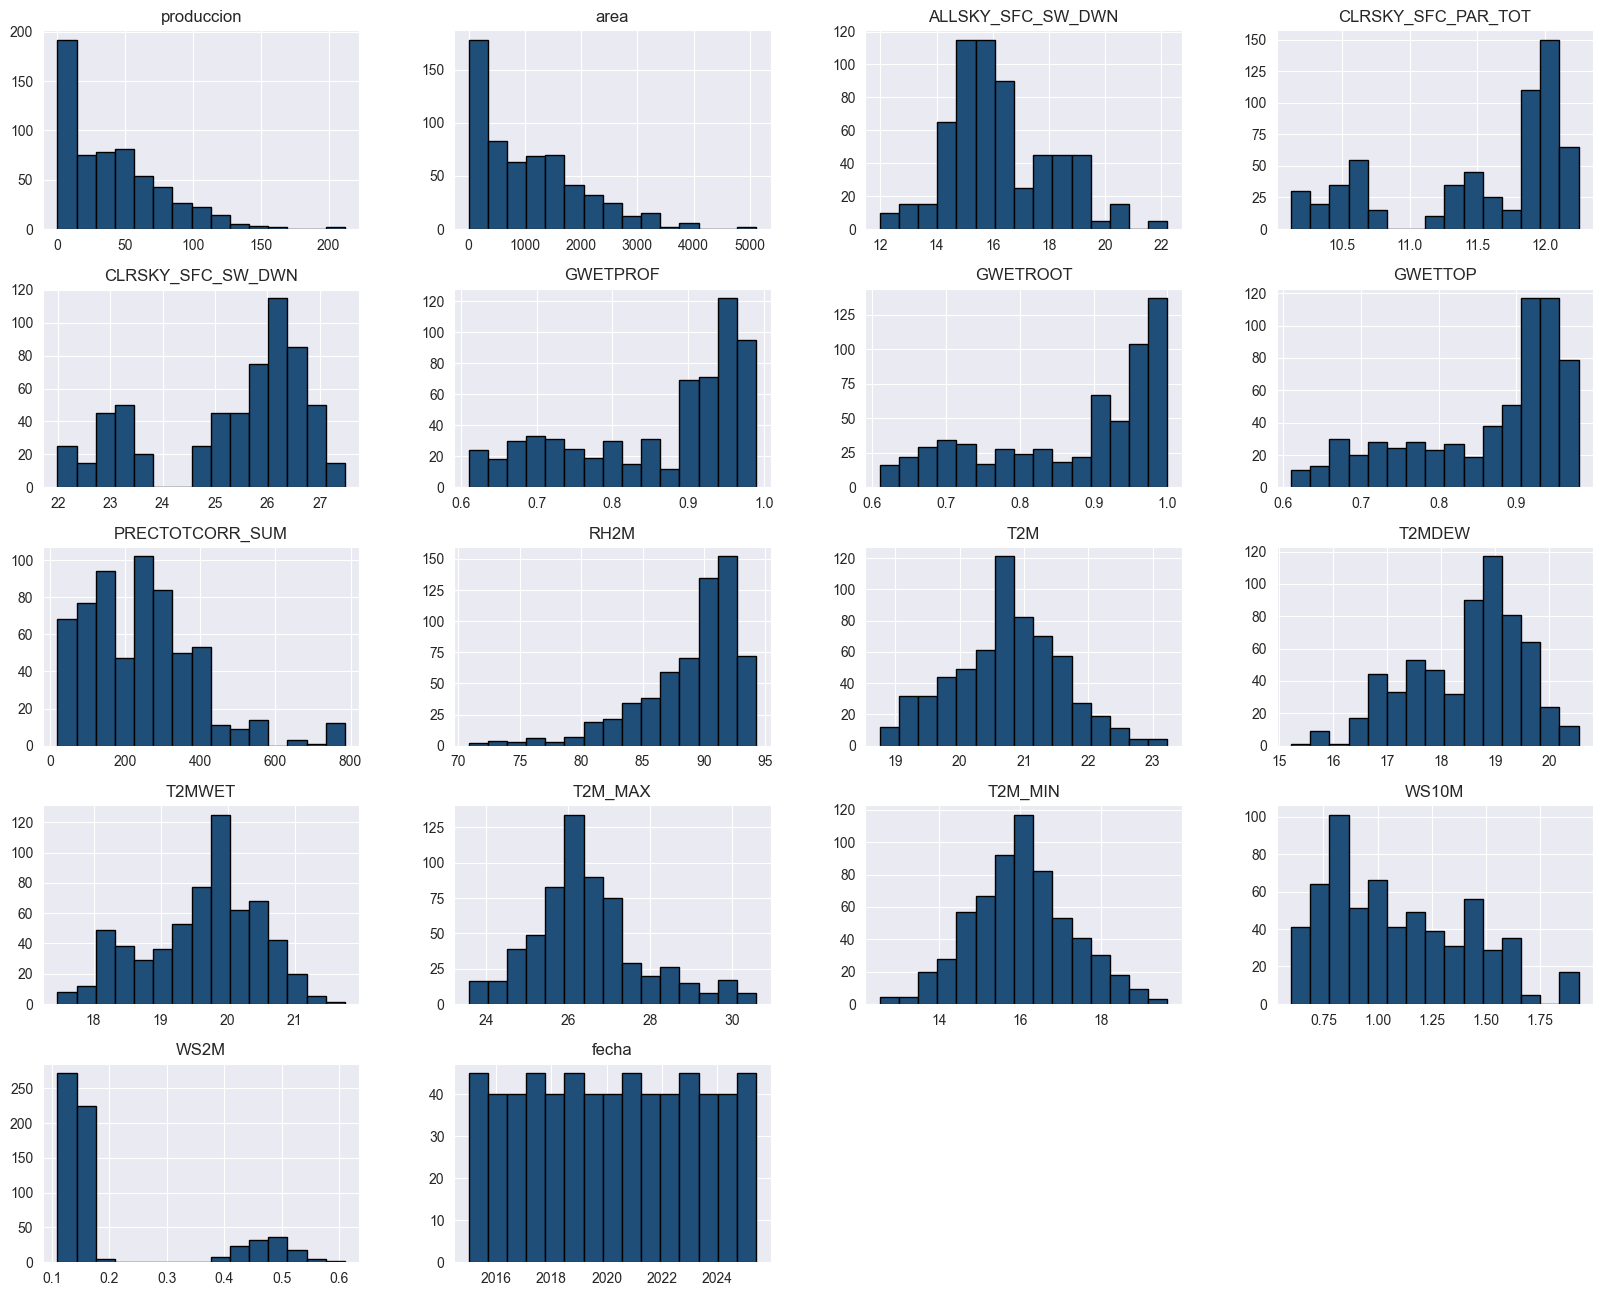

In [166]:
df.hist(bins=15, figsize=(20, 16), color='#1F4E79', edgecolor='black')

In [167]:
df.describe()

,produccion,area,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_PAR_TOT,CLRSKY_SFC_SW_DWN,GWETPROF,GWETROOT,GWETTOP,PRECTOTCORR_SUM,RH2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,WS10M,WS2M,fecha
count,597.000000,597.000000,610.000000,610.000000,610.000000,625.000000,625.000000,625.000000,625.000000,625.00000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,630
mean,40.734729,1072.740074,16.261475,11.505902,25.266885,0.857984,0.869312,0.861168,243.822176,88.87344,20.731776,18.487440,19.609600,26.487136,16.051120,1.095552,0.208960,2020-03-16 18:28:34.285714176
min,0.049000,0.813400,11.980000,10.120000,21.990000,0.610000,0.610000,0.610000,19.710000,70.83000,18.760000,15.220000,17.460000,23.580000,12.540000,0.600000,0.110000,2015-01-01 00:00:00
25%,9.100000,222.732000,15.060000,10.750000,23.770000,0.760000,0.770000,0.790000,124.250000,87.23000,20.220000,17.700000,19.040000,25.670000,15.300000,0.820000,0.140000,2017-08-01 00:00:00
50%,33.950000,891.547000,15.820000,11.855000,25.815000,0.910000,0.920000,0.910000,242.730000,90.49000,20.740000,18.710000,19.800000,26.300000,16.060000,1.040000,0.150000,2020-03-16 12:00:00
75%,60.900000,1620.400000,17.700000,12.010000,26.340000,0.950000,0.970000,0.940000,325.220000,91.61000,21.320000,19.220000,20.220000,27.060000,16.760000,1.350000,0.160000,2022-11-01 00:00:00
max,212.050000,5111.900000,22.220000,12.250000,27.480000,0.990000,1.000000,0.980000,785.070000,94.25000,23.230000,20.550000,21.750000,30.590000,19.640000,1.930000,0.610000,2025-06-01 00:00:00
std,36.280235,946.435874,1.844216,0.654114,1.450632,0.111946,0.117336,0.100483,150.481351,4.16314,0.847127,1.040144,0.840438,1.363224,1.227621,0.324077,0.133353,NaN


### BoxPlot para "area" y "produccion"

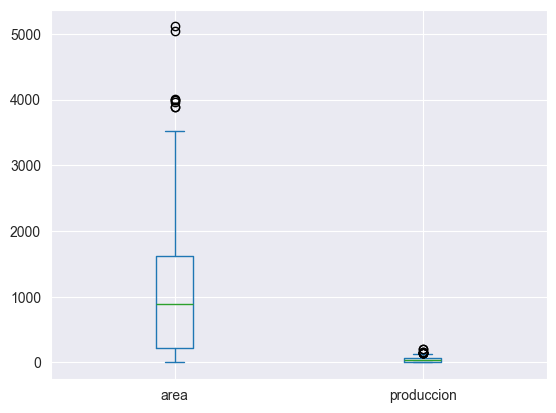

In [168]:
df[['area', 'produccion']].plot.box()
plt.show()

### Gráfico de Densidad

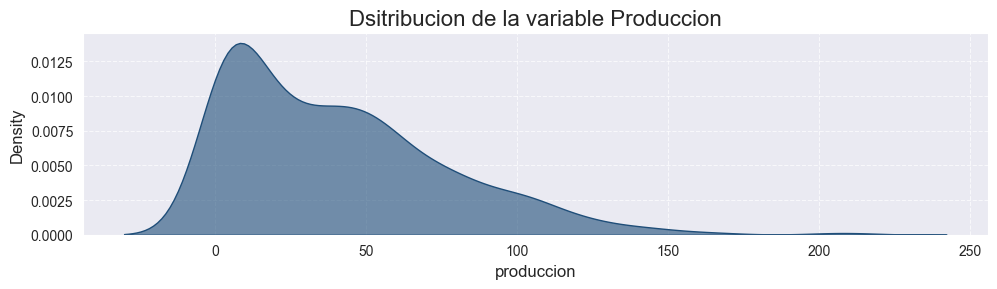

In [169]:
plt.figure(figsize=(10, 3))
sns.kdeplot(df['produccion'], fill=True, color='#1F4E79', alpha=0.6)
plt.title('Dsitribucion de la variable Produccion', fontsize=16)
plt.xlabel('produccion', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\Fiorella Victoria\AppData\Local\Temp\ipykernel_22448\1097646491.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  produccion_mensual = df.set_index('fecha').resample('M')['produccion'].sum()


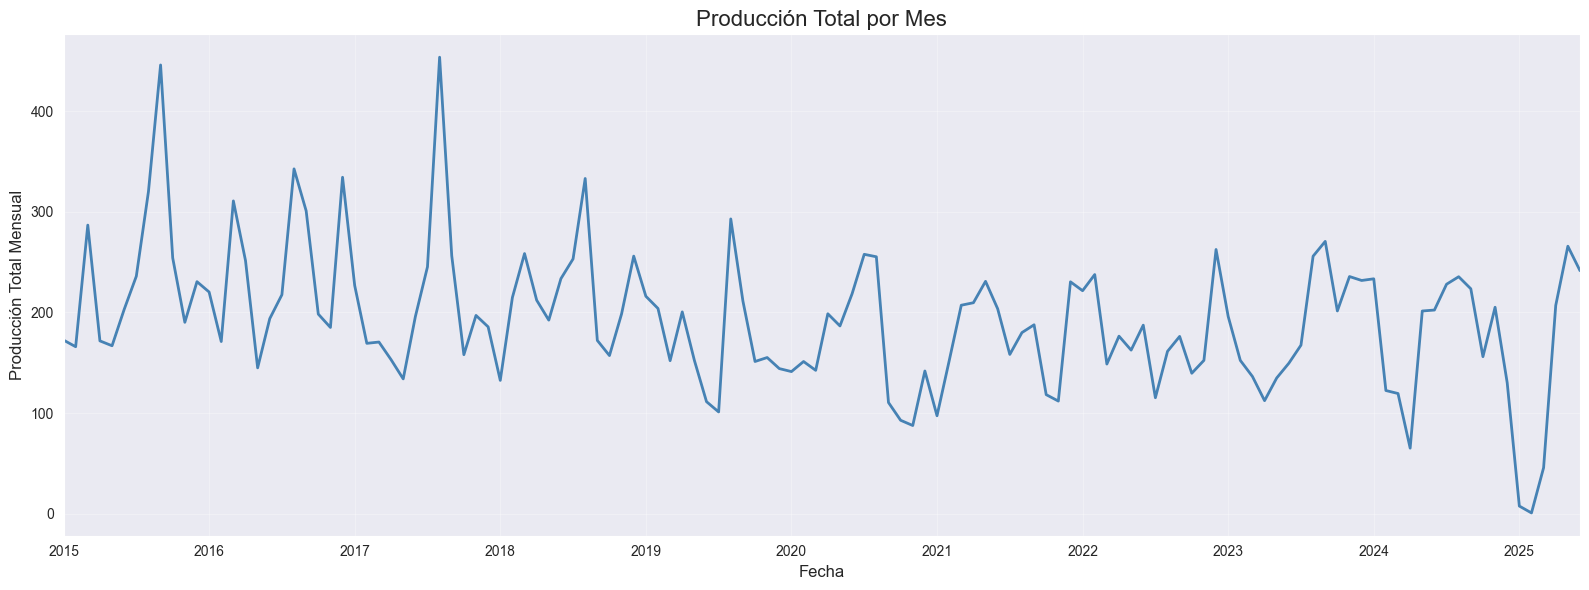

In [170]:
produccion_mensual = df.set_index('fecha').resample('M')['produccion'].sum()

plt.figure(figsize=(16, 6))
produccion_mensual.plot(kind='line', color='steelblue', linewidth=2)
plt.title('Producción Total por Mes', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Producción Total Mensual', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [171]:
df.sort_values(by=['produccion'], ascending=False)

,canton,produccion,area,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_PAR_TOT,CLRSKY_SFC_SW_DWN,GWETPROF,GWETROOT,GWETTOP,PRECTOTCORR_SUM,RH2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,WS10M,WS2M,fecha
644,CARTAGO,212.050,5111.90000,15.65,11.85,25.99,0.90,0.92,0.91,271.54,92.01,20.85,19.24,20.04,26.37,15.80,0.86,0.13,2015-09-01
763,CARTAGO,204.400,5045.83600,16.27,12.19,26.68,0.96,0.97,0.94,256.78,90.62,20.91,19.02,19.97,26.81,15.61,0.82,0.14,2017-08-01
1102,OREAMUNO,166.635,3957.63608,13.44,10.66,22.86,0.97,0.99,0.96,294.26,93.77,21.08,19.82,20.45,26.10,16.67,0.82,0.14,2023-11-01
674,OREAMUNO,160.650,3386.75000,18.38,11.39,25.65,0.66,0.65,0.65,31.67,81.08,21.29,17.24,19.27,30.08,15.79,1.35,0.14,2016-03-01
713,ALVARADO,149.247,3990.26650,15.70,11.89,26.02,0.81,0.83,0.85,323.10,91.43,21.03,19.31,20.17,26.79,16.08,0.84,0.14,2016-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,OREAMUNO,NaN,NaN,17.11,11.21,24.71,0.84,0.84,0.84,57.69,88.61,19.99,17.70,18.85,26.03,15.61,1.46,0.15,2025-02-01
1224,EL GUARCO,NaN,NaN,15.63,10.43,22.81,0.91,0.92,0.91,112.80,84.88,20.97,18.12,19.55,25.23,16.90,0.99,0.44,2025-01-01
1236,CARTAGO,NaN,NaN,15.63,10.43,22.81,0.91,0.92,0.90,122.30,91.29,19.89,18.14,19.01,24.42,14.90,1.42,0.14,2025-01-01
1237,CARTAGO,NaN,NaN,17.11,11.21,24.71,0.84,0.84,0.84,57.69,88.61,19.99,17.70,18.85,26.03,15.61,1.46,0.15,2025-02-01


### Rellenar NaN

In [172]:
df.fillna(method='ffill', inplace=True)

C:\Users\Fiorella Victoria\AppData\Local\Temp\ipykernel_22448\4002983762.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [173]:
print(df)

         canton  produccion        area  ALLSKY_SFC_SW_DWN  \
600   TURRIALBA       5.600   119.00000              16.45   
601   TURRIALBA      18.550   525.92500              17.32   
602   TURRIALBA       1.400    30.00000              19.15   
603   TURRIALBA       7.700   183.00000              18.01   
604   TURRIALBA      29.600   878.00000              15.06   
...         ...         ...         ...                ...   
1249   ALVARADO       7.000   181.33000              17.11   
1250   ALVARADO      26.740   596.40840              17.11   
1251   ALVARADO      95.921  2446.57440              17.11   
1252   ALVARADO     101.941  3172.63104              17.11   
1253   ALVARADO      94.213  3328.86636              17.11   

      CLRSKY_SFC_PAR_TOT  CLRSKY_SFC_SW_DWN  GWETPROF  GWETROOT  GWETTOP  \
600                10.55              23.43      0.92      0.93     0.91   
601                11.27              25.12      0.85      0.86     0.86   
602                11.97   

In [113]:
print(df.isnull().sum())

canton                0
produccion            0
area                  0
ALLSKY_SFC_SW_DWN     0
CLRSKY_SFC_PAR_TOT    0
CLRSKY_SFC_SW_DWN     0
GWETPROF              0
GWETROOT              0
GWETTOP               0
PRECTOTCORR_SUM       0
RH2M                  0
T2M                   0
T2MDEW                0
T2MWET                0
T2M_MAX               0
T2M_MIN               0
WS10M                 0
WS2M                  0
fecha                 0
dtype: int64


### Combinaciones de cantones y fechas mensuales

In [174]:

# Crear rango de fechas mensuales de enero 2005 a mayo 2025
fechas = pd.date_range(start='2005-01-01', end='2025-05-01', freq='MS')  # MS = Month Start

# Obtener lista única de cantones
cantones = df['canton'].unique()

# Crear todas las combinaciones posibles
combinaciones = pd.MultiIndex.from_product([cantones, fechas], names=['canton', 'fecha']).to_frame(index=False)


In [115]:
# Asegurar que Fecha en df está al inicio del mes
df['fecha'] = df['fecha'].dt.to_period('M').dt.to_timestamp()

# Crear DataFrame con los registros existentes
df_existente = df[['canton', 'fecha']].drop_duplicates()

# Hacer merge para ver cuáles combinaciones faltan
faltantes = combinaciones.merge(df_existente, on=['canton', 'fecha'], how='left', indicator=True)

# Filtrar solo las combinaciones que NO están en el df
faltantes = faltantes[faltantes['_merge'] == 'left_only'].drop(columns=['_merge'])
print(faltantes)

         canton      fecha
0     TURRIALBA 2005-01-01
1     TURRIALBA 2005-02-01
2     TURRIALBA 2005-03-01
3     TURRIALBA 2005-04-01
4     TURRIALBA 2005-05-01
...         ...        ...
1095   ALVARADO 2014-08-01
1096   ALVARADO 2014-09-01
1097   ALVARADO 2014-10-01
1098   ALVARADO 2014-11-01
1099   ALVARADO 2014-12-01

[600 rows x 2 columns]


In [175]:
print(df.corr(numeric_only=True)['produccion'].sort_values())

WS2M                 -0.476623
T2M_MIN              -0.236475
T2M                  -0.208086
T2MWET               -0.103549
T2M_MAX              -0.099586
ALLSKY_SFC_SW_DWN    -0.020337
PRECTOTCORR_SUM      -0.019498
T2MDEW                0.001616
WS10M                 0.029798
CLRSKY_SFC_PAR_TOT    0.029880
CLRSKY_SFC_SW_DWN     0.031726
GWETTOP               0.043762
GWETPROF              0.048381
GWETROOT              0.056420
RH2M                  0.225824
area                  0.987585
produccion            1.000000
Name: produccion, dtype: float64


In [176]:
df = df.drop([
    'WS10M',
    'GWETTOP',
    'GWETPROF',
    'GWETROOT',
    'ALLSKY_SFC_SW_DWN',
    'CLRSKY_SFC_SW_DWN',
    'CLRSKY_SFC_PAR_TOT'
],axis=1)


<Axes: >

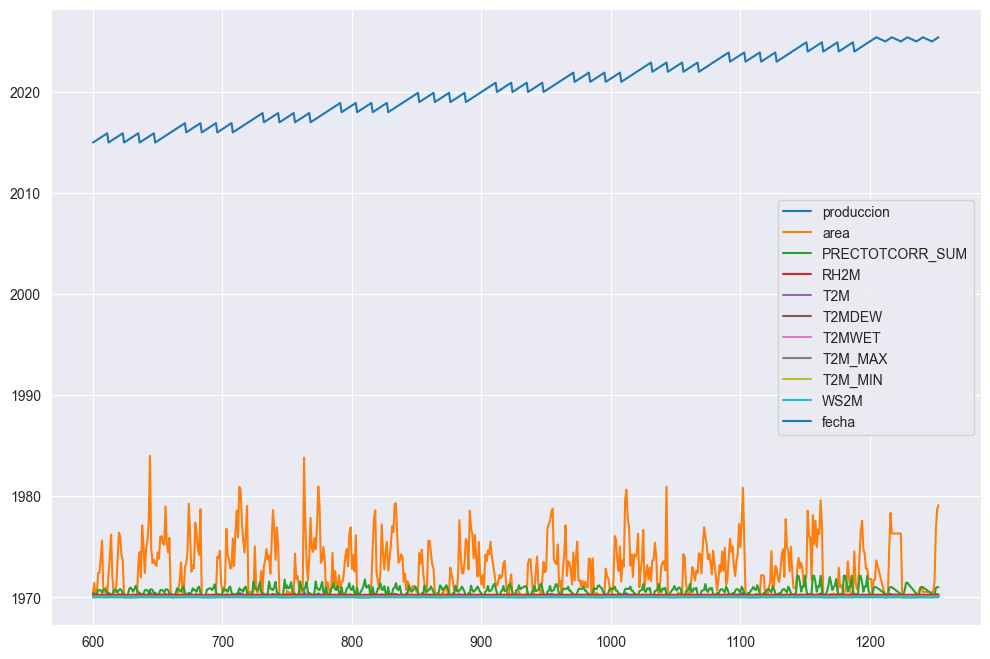

In [177]:
df.plot(figsize=(12,8))

### Preparación de variable categórica

In [178]:
#Prepara la variable categorica
df['canton_id'] = df['canton'].astype('category').cat.codes
num_cantones = df['canton_id'].nunique()


In [179]:
df= df.drop('canton',axis=1)

### Normalización de variables numéricas

In [180]:
df.head()

,produccion,area,PRECTOTCORR_SUM,RH2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,WS2M,fecha,canton_id
600,5.60,119.000,171.90,90.67,19.20,17.37,18.28,24.04,15.68,0.16,2015-01-01,4
601,18.55,525.925,107.62,89.37,19.11,17.01,18.06,24.87,15.11,0.16,2015-02-01,4
602,1.40,30.000,79.44,86.31,19.49,16.73,18.11,26.38,14.65,0.16,2015-03-01,4
603,7.70,183.000,115.93,85.46,20.80,17.82,19.31,28.75,15.02,0.14,2015-04-01,4
604,29.60,878.000,253.66,89.03,20.93,18.70,19.81,26.83,14.52,0.13,2015-05-01,4


In [181]:
base_path = obtener_ruta_app("TemplateAgroIA")  # C:\Template-AgroIA
file_path = os.path.join(base_path, "data", "processed", "rnn", "rnn_produccion.csv")
df.to_csv(file_path, index=False)